Approach 2 for logistic regression - withholding one dataset for validation but utilizing the rest of the datasets for training only with no data partitioning for test set (this frees up more data for training). The traditional approach using the 70/30 training/testing split yielded slightly better results, and using more training data as in this notebook did not make a significant difference. However, this approach might potentially yield better accuracies if more training data is made available in the future.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # for logistic regression
from sklearn import metrics                            # to create confusion matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score


In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation

features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
           ]

In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
df4 = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)


df5 = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df5 = df_transformation(df5)


# reading file from 9/22 dataset
df6 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df6 = df_transformation(df6)


# reading file from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df7 = df_transformation(df7)

# reading files from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df8 = df_transformation(df8)



C:\Users\fariy\AppData\Local\Temp\ipykernel_23644\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# QUICK STOPS USING DATA FROM 9/19, 9/22, 10/20 TO TRAIN AND 10/6 TO VALIDATE

In [5]:
# Dataframe labeling for Quick Stops 
df_qs = pd.concat([df1, df2, df3, df4, df5, df6, df8]).reset_index()
df_qs['Quick_Stop'] = 0

df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:00:45' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1


In [6]:
df_qs['Quick_Stop'].value_counts()

0    9195
1     488
Name: Quick_Stop, dtype: int64

In [7]:
#call features used in model
model_features = ['hasWeightOnWheels',
                  'absoluteAltitude',
                  'groundSpeed',
                  'climbOrDescentRate',
                  'cyclicPositionPitch',
                  'cyclicPositionRoll',
                  'collectivePosition',
                  'antiTorquePedalPosition',
                  'throttlePosition',
                  'e1Torque',
                  'e2Torque'
                 ]

In [8]:
x = df_qs[model_features]
y = df_qs['Quick_Stop']

In [9]:
x.head()

,hasWeightOnWheels,absoluteAltitude,groundSpeed,climbOrDescentRate,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
0,1.0,0.032500,0.137500,0.582125,24.912250,-4.404250,3.726,-38.213000,7.283500,-5.219500,-5.219500
1,1.0,0.054773,0.155500,2.061705,0.949909,1.013386,3.726,-38.213000,39.997136,-3.727205,-3.727205
2,1.0,0.060000,0.018477,1.114295,-0.176841,0.624068,3.726,-38.216068,87.756318,6.978659,6.978659
3,1.0,0.060000,0.005200,0.181933,0.039356,0.124244,3.726,-38.228200,100.000000,28.398222,28.398222
4,1.0,0.060000,0.002542,-0.000208,0.065479,0.052958,3.726,-38.282792,100.000000,56.248208,56.248208


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Quick_Stop, dtype: int64

In [12]:
# Check the train data

total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1

In [13]:
print(Quick_Stop)
print(non_Quick_Stop)
print(round(non_Quick_Stop/total,2))

488
9195
0.95


Create a balanced dataset & train Logistic regression


In [14]:
df_qs_train = df_qs[df_qs['Quick_Stop']==1]           # The original rows that have label 1
non_df_qs_train = df_qs[df_qs['Quick_Stop']==0]       # The original rows that have label 0

In [15]:
print(len(df_qs_train))
print(len(non_df_qs_train))

488
9195


In [16]:
sampled_non_df_qs = non_df_qs_train.sample(n = 488)    # Sample 488 data points from the quick stop data

In [17]:
print(len(df_qs_train))
print(len(sampled_non_df_qs))

488
488


In [18]:
merged = pd.concat([df_qs_train, sampled_non_df_qs])     # After class-balancing, concatenating both classes into 1 dataframe

In [19]:
print(len(merged))

976


In [20]:
merged

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Quick_Stop
3173,538,2022-09-19 22:00:45,39.869027,-75.256668,58.814000,175.889820,163.854760,26.245640,26.472019,-1.149760,...,0.0,-1.038940,-19.506000,-12.180060,44.076980,-13.315440,54.298300,57.240800,57.240800,1
3174,539,2022-09-19 22:00:46,39.868897,-75.256681,64.269200,175.790880,163.755880,28.406860,28.583419,-1.324340,...,0.0,-0.684400,-18.378260,-12.318980,43.792500,-13.447180,54.417980,57.502880,57.502880,1
3175,540,2022-09-19 22:00:47,39.868759,-75.256688,69.400816,175.941184,163.906184,30.540959,30.705495,-1.287327,...,0.0,-0.348143,-17.434837,-11.388592,43.431571,-11.185776,54.507163,57.832041,57.832041,1
3176,541,2022-09-19 22:00:48,39.868612,-75.256689,74.831400,177.060120,165.025180,32.817100,33.046779,-1.400080,...,0.0,0.144360,-17.746420,-11.170180,44.359920,-12.769160,55.128120,58.559720,58.559720,1
3177,542,2022-09-19 22:00:49,39.868455,-75.256685,82.046078,177.944647,165.909667,35.226863,35.570474,-1.765961,...,0.0,0.362627,-16.859510,-10.850255,44.784137,-15.211882,56.737294,62.649000,62.649000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,582,2022-09-19 20:15:47,39.332251,-74.258695,2061.910000,323.209689,310.798689,131.590444,131.591091,-3.114222,...,0.0,2.724956,-43.305956,-4.706489,49.305000,27.151756,72.225178,88.421489,88.421489,0
7849,629,2022-10-20 21:31:24,51.477140,-0.465954,176.320714,84.471357,84.240905,27.003667,27.777371,12.773524,...,0.0,-0.382167,-4.285429,17.815643,47.258000,-14.059857,56.976214,63.543905,63.543905,0
2953,318,2022-09-19 21:57:05,39.871998,-75.244580,4.588980,255.280020,243.237469,5.269327,5.310761,3.822163,...,0.0,-0.350694,-7.140735,-1.215204,42.229327,-7.428306,51.986918,52.174837,52.174837,0
1210,1210,2022-09-19 20:31:52,39.428740,-74.494335,1310.747959,286.169245,273.843959,130.983531,131.011344,-4.043163,...,0.0,-1.685633,-34.806061,8.448143,47.679000,-43.693143,76.659714,93.738837,93.738837,0


In [21]:
# Split the data into X and y
x = merged[model_features]   
y = merged['Quick_Stop']


In [22]:
#LR standardizing 
scaler = StandardScaler()
x = scaler.fit_transform(x)


LR = LogisticRegression()    # Bring empty logistic regression model
LR.fit(x,y)                  # Train the model with all data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR.score(x, y)))



Accuracy of LR classifier on training set: 0.77


In [23]:
# Checking the training data
total = 0
Quick_Stop = 0
non_Quick_Stop = 0
for i in y:
    if i == 1:
        Quick_Stop += 1
    else:
        non_Quick_Stop += 1
    total += 1
    
print(Quick_Stop)
print(non_Quick_Stop)
print(non_Quick_Stop/total)

488
488
0.5


In [24]:
y_pred_LR = LR.predict(x)

LR_accuracy = metrics.accuracy_score(y_pred_LR,y)
print('Quick Stop accuracy = ', LR_accuracy)
print('Recall = ',metrics.recall_score(y, y_pred_LR))
print('Precision = ',metrics.precision_score(y, y_pred_LR))

Quick Stop accuracy =  0.7674180327868853
Recall =  0.8504098360655737
Precision =  0.7293497363796133


Visualize the Confusion Matrix

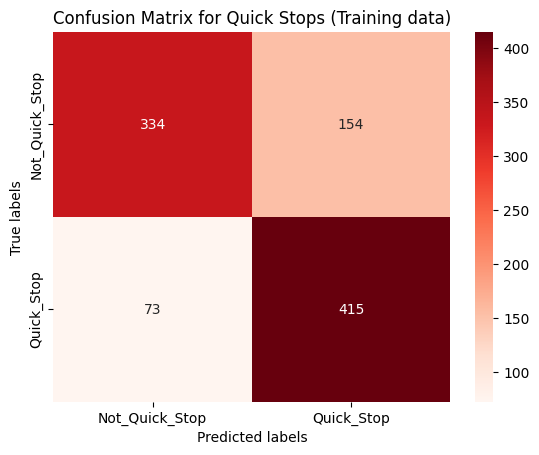

In [26]:
cm = metrics.confusion_matrix(y, y_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
            
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt='.0f', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Quick Stops (Training data)')
ax.xaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']); ax.yaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']);

In [27]:
y_pred_proba = LR.predict_proba(x)   # Get the probability of LR classification 
                                          
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y, y_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

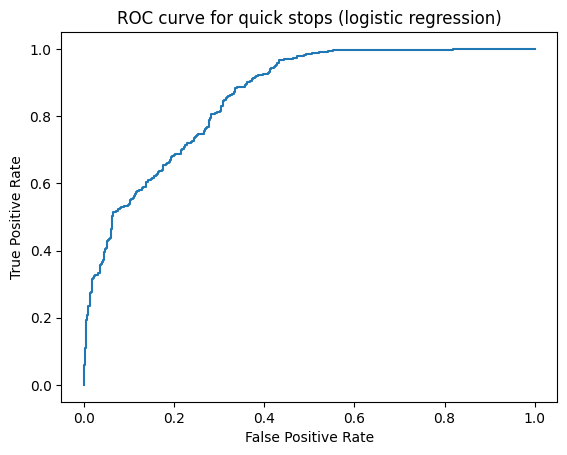

In [28]:
# Plot roc curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for quick stops (logistic regression)')
plt.plot(false_positive_rate, true_positive_rate)  


In [29]:
# Compute AUC
auc = metrics.auc(false_positive_rate, true_positive_rate)   # metrics also provide the auc area
print("AUC for quick stops (LR) =", auc)

AUC for quick stops (LR) = 0.858803916957807


### Saving model

In [30]:
import pickle

In [31]:
pickle.dump(LR, open('quick_ss2.pkl', 'wb'))

In [32]:
pickle.dump(scaler, open('scaler_ss.pkl','wb'))

### Load new data for validation

In [33]:
# reading file from 10/06 dataset
dfqs = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfqs = df_transformation(dfqs)

C:\Users\fariy\AppData\Local\Temp\ipykernel_23644\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [34]:
dfqs['Quick_Stop'] = 0

dfqs.loc[(dfqs['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 1
dfqs.loc[(dfqs['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 1

dfqs

,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,roll,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Quick_Stop
0,2022-10-06 13:49:02,39.464831,-74.565770,0.076316,270.417368,258.116737,0.146368,0.158536,0.716316,-0.245842,...,1.0,-1.099105,-15.622737,-45.371053,3.574000,-7.060158,0.000000,-2.022158,-2.022158,0
1,2022-10-06 13:49:03,39.464831,-74.565770,0.084419,270.058698,257.757977,0.046674,0.056327,-0.002674,-0.840860,...,1.0,-0.966977,-19.012302,-42.589953,3.574000,-7.059860,0.000000,-1.269047,-1.269047,0
2,2022-10-06 13:49:04,39.464831,-74.565770,0.105000,270.057300,257.756700,0.007000,0.007924,-0.094025,-1.189075,...,1.0,-0.653625,-14.741175,-41.667850,3.577050,-6.958850,0.000000,-0.567350,-0.567350,0
3,2022-10-06 13:49:05,39.464831,-74.565770,0.105581,270.066093,257.765419,0.004023,0.004905,-0.071186,-1.184349,...,1.0,-0.397023,-9.655767,-40.678442,3.578000,-6.874140,0.000000,-0.056791,-0.056791,0
4,2022-10-06 13:49:06,39.464831,-74.565770,0.098049,270.072756,257.772073,0.007024,0.008670,-0.000659,-1.049683,...,1.0,-0.210390,-3.997976,-39.844268,3.578000,-6.885268,0.000000,0.346756,0.346756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2022-10-06 14:10:04,39.451153,-74.584421,0.080000,196.844319,184.554447,2.005553,2.005634,-0.466787,0.614021,...,1.0,-0.139745,13.603340,26.331340,3.543894,-3.961723,43.922319,34.810319,34.810319,0
1263,2022-10-06 14:10:05,39.451144,-74.584422,0.089200,196.673220,184.383320,1.988140,1.988127,-0.305220,0.522100,...,1.0,-0.154940,17.764740,26.367820,3.548580,-3.458580,44.113300,35.191540,35.191540,0
1264,2022-10-06 14:10:06,39.451135,-74.584423,0.093125,196.531375,184.241542,1.986812,1.986784,-0.007250,0.472000,...,1.0,-0.148687,22.141667,25.396271,3.591563,-2.788000,44.298854,35.620792,35.620792,0
1265,2022-10-06 14:10:07,39.451126,-74.584424,0.102889,196.315511,184.025667,1.969689,1.969667,0.263911,0.424578,...,1.0,-0.172756,26.602311,27.095756,3.590222,-2.788000,44.327689,35.752400,35.752400,0


In [35]:
dfqs['Quick_Stop'].value_counts()

0    1160
1     107
Name: Quick_Stop, dtype: int64

In [36]:
# Split the data into X and y
X = dfqs[model_features]   
Y = dfqs['Quick_Stop']

### Load pickle

In [37]:
LR_loaded = pickle.load(open('quick_ss2.pkl', 'rb'))
scaler_loaded = pickle.load(open('scaler_ss.pkl','rb'))

In [38]:
# LR

x_valid = scaler_loaded.transform(X)


In [39]:
validation_LR = LR_loaded.predict(x_valid)
print("Accuracy of Model::",accuracy_score(Y,validation_LR))

Accuracy of Model:: 0.6298342541436464


In [40]:
y_pred_LR = LR.predict(x_valid)

LR8_accuracy = metrics.accuracy_score(y_pred_LR,Y)
print('Quick Stop accuracy (validation) = ', LR8_accuracy)
print('Recall = ',metrics.recall_score(Y, y_pred_LR))
print('Precision = ',metrics.precision_score(Y, y_pred_LR))

Quick Stop accuracy (validation) =  0.6298342541436464
Recall =  0.7476635514018691
Precision =  0.1532567049808429


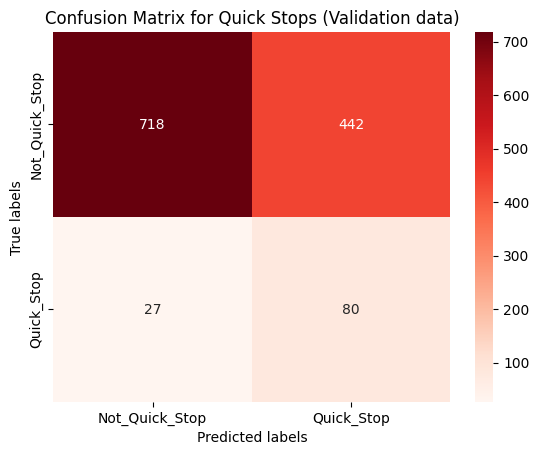

In [41]:
CM = metrics.confusion_matrix(Y, y_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                                
AX= plt.subplot()
sns.heatmap(CM, annot=True, cmap = 'Reds', fmt='.0f', ax=AX); 

# labels, title and ticks
AX.set_xlabel('Predicted labels');AX.set_ylabel('True labels'); 
AX.set_title('Confusion Matrix for Quick Stops (Validation data)')
AX.xaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']); AX.yaxis.set_ticklabels(['Not_Quick_Stop', 'Quick_Stop']);

# SURFACE TAXIS USING DATA FROM 9/19, 9/20, 9/22, 10/6 TO TRAIN AND 10/27 TO VALIDATE

In [42]:
# Dataframe labeling for Surface Taxis
df_surface = pd.concat([df1, df2, df3, df4, df5, df6, df7]).reset_index()
df_surface['Surface_Taxi'] = 0

df_surface.loc[(df_surface['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 1


In [43]:
df_surface['Surface_Taxi'].value_counts()

0    7615
1     872
Name: Surface_Taxi, dtype: int64

In [44]:
x2 = df_surface[model_features]
y2 = df_surface['Surface_Taxi']

In [45]:
#LR standard 
scaler2 = StandardScaler()
x2 = scaler2.fit_transform(x2)

LR2 = LogisticRegression()    # Bring empty logistic regression model
LR2.fit(x2,y2)      # Train the model with training data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR2.score(x2, y2)))


Accuracy of LR classifier on training set: 0.96


In [46]:
y2_pred_LR = LR2.predict(x2)    # Get predicted y from the logistic regression model

In [47]:
# Get the classification accuracy, Recall, and Precision with the metrics function.
LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2)
print('Classification accuracy = ',LR2_accuracy)
print('Recall = ',metrics.recall_score(y2, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2, y2_pred_LR))

Classification accuracy =  0.9631200659832685
Recall =  0.8600917431192661
Precision =  0.7970244420828906


In [48]:
# Check the train data

total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1

In [49]:
print(Surface_Taxi)
print(non_Surface_Taxi)
print(round(non_Surface_Taxi/total,2))

872
7615
0.9


Create a balanced dataset & train Logistic regression

In [50]:
df_surface_train = df_surface[df_surface['Surface_Taxi']==1]           # The original rows that have label 1
non_df_surface_train = df_surface[df_surface['Surface_Taxi']==0]       # The original rows that have label 0

In [51]:
print(len(df_surface_train))
print(len(non_df_surface_train))

872
7615


In [52]:
sampled_non_df_surface = non_df_surface_train.sample(n = 872)    # Sample 872 data points from the surface taxi data

In [53]:
print(len(df_surface_train))
print(len(sampled_non_df_surface))

872
872


In [54]:
merged2 = pd.concat([df_surface_train, sampled_non_df_surface])     # After balancing, concatenating both classes into 1 dataframe

In [55]:
print(len(merged2))

1744


In [56]:
merged2

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Surface_Taxi
2758,123,2022-09-19 21:53:50,39.872826,-75.234782,0.232708,259.489000,247.440354,0.682083,0.684220,-1.061208,...,1.0,0.008646,-20.697396,-4.869979,32.787938,11.191542,42.742437,31.345979,31.345979,1
2759,124,2022-09-19 21:53:51,39.872824,-75.234788,0.245306,259.937388,247.888714,1.485755,1.485781,-1.190224,...,1.0,0.283837,-24.496102,-0.463061,33.563122,11.287429,45.236265,36.912918,36.912918,1
2760,125,2022-09-19 21:53:52,39.872820,-75.234799,0.243750,260.249188,248.200521,2.323854,2.323846,-1.215479,...,1.0,0.324771,-23.142354,-0.877667,33.575000,11.824292,44.872375,37.355271,37.355271,1
2761,126,2022-09-19 21:53:53,39.872816,-75.234814,0.255102,260.700082,248.651551,2.799245,2.799233,-1.244388,...,1.0,0.357286,-22.971490,-1.427184,33.575000,12.283143,43.904286,35.235449,35.235449,1
2762,127,2022-09-19 21:53:54,39.872811,-75.234831,0.254286,261.131612,249.083061,3.203041,3.203053,-1.211551,...,1.0,0.359000,-22.986388,-1.904898,33.575000,12.019673,43.528714,34.235020,34.235020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,798,2022-09-22 21:28:13,20.889012,-156.434000,5.130968,90.299903,99.780710,6.265226,6.268978,7.525419,...,0.0,-2.987839,-10.419742,-3.552323,43.935516,-23.376097,54.068129,56.847742,56.847742,0
3225,590,2022-09-19 22:01:37,39.861453,-75.255398,3.755200,132.676440,120.642120,2.764180,2.934846,7.190380,...,0.0,0.172280,-4.606940,3.702660,43.011080,10.195100,52.126280,52.237440,52.237440,0
4489,164,2022-09-20 20:31:15,39.453150,-74.573786,110.918205,247.369718,235.074846,42.258590,42.273232,-0.265692,...,0.0,-0.692692,-16.329744,-10.454949,40.227000,-17.259718,52.635692,53.185051,53.185051,0
6378,1245,2022-09-22 21:35:40,20.897349,-156.430076,205.615116,197.544233,207.026186,9.532558,12.107163,9.512674,...,0.0,0.308000,-7.836349,-9.597930,37.964953,5.455070,49.324326,45.840093,45.840093,0


In [57]:
# Split the data into X and y
x2 = merged2[model_features]   
y2 = merged2['Surface_Taxi']

In [58]:
total = 0
Surface_Taxi = 0
non_Surface_Taxi = 0
for i in y2:
    if i == 1:
        Surface_Taxi += 1
    else:
        non_Surface_Taxi += 1
    total += 1
    
print(Surface_Taxi)
print(non_Surface_Taxi)
print(non_Surface_Taxi/total)

872
872
0.5


In [59]:
#LR standardizing 
scaler2 = StandardScaler()
x2 = scaler2.fit_transform(x2)


LR2 = LogisticRegression()    # Bring empty logistic regression model
LR2.fit(x2,y2)                  # Train the model with all data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR2.score(x2, y2)))


Accuracy of LR classifier on training set: 0.93


In [60]:
y2_pred_LR = LR2.predict(x2)

LR2_accuracy = metrics.accuracy_score(y2_pred_LR,y2)
print('Surface Taxi accuracy (training) = ', LR2_accuracy)
print('Recall = ',metrics.recall_score(y2, y2_pred_LR))
print('Precision = ',metrics.precision_score(y2, y2_pred_LR))

Surface Taxi accuracy (training) =  0.9323394495412844
Recall =  0.9174311926605505
Precision =  0.9456264775413712


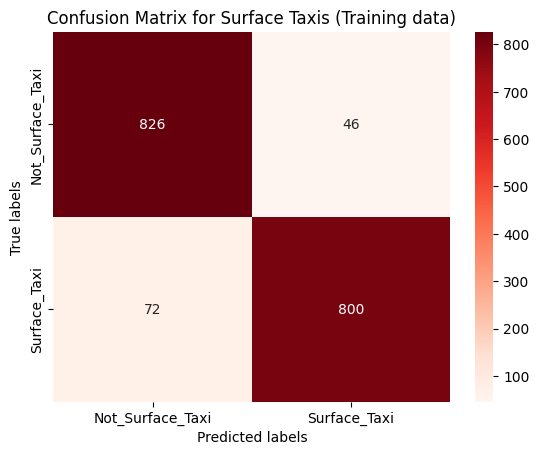

In [61]:
cm2 = metrics.confusion_matrix(y2, y2_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
           
ax2= plt.subplot()
sns.heatmap(cm2, annot=True, cmap = 'Reds', fmt='.0f', ax=ax2);  

# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for Surface Taxis (Training data)')
ax2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); ax2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

In [62]:
y2_pred_proba = LR2.predict_proba(x2)   # Get the probability of LR classification 
                                          
false_positive_rate2, true_positive_rate2, thresholds2 = metrics.roc_curve(y2, y2_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

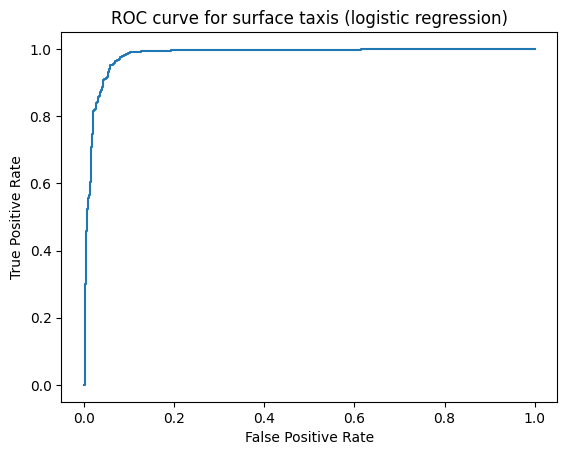

In [63]:
# Plot ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for surface taxis (logistic regression)')
plt.plot(false_positive_rate2, true_positive_rate2)  


In [64]:
# Compute AUC
auc2 = metrics.auc(false_positive_rate2, true_positive_rate2)   # metrics also provide the auc area
print("AUC for surface taxis (LR) =", auc2)

AUC for surface taxis (LR) = 0.9810056497769548


### Saving Model

In [65]:
pickle.dump(LR2, open('surface_ss2.pkl', 'wb'))

In [66]:
pickle.dump(scaler2, open('scaler2_ss.pkl','wb'))

### Load new data for validation 

In [67]:
# reading files from 10/27 dataset
dfsurface = pd.read_csv('SimData_2022.10.27_17.55.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfsurface = df_transformation(dfsurface)

C:\Users\fariy\AppData\Local\Temp\ipykernel_23644\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [68]:
dfsurface['Surface_Taxi'] = 0

dfsurface.loc[(dfsurface['datetime'].between('2022-10-27 21:57:45' , '2022-10-27 21:59:45' , inclusive='both')),['Surface_Taxi']] = 1
dfsurface.loc[(dfsurface['datetime'].between('2022-10-27 22:00:30' , '2022-10-27 22:04:55' , inclusive='both')),['Surface_Taxi']] = 1
dfsurface.loc[(dfsurface['datetime'].between('2022-10-27 22:06:00' , '2022-10-27 22:07:59' , inclusive='both')),['Surface_Taxi']] = 1
dfsurface.loc[(dfsurface['datetime'].between('2022-10-27 22:09:03' , '2022-10-27 22:11:12' , inclusive='both')),['Surface_Taxi']] = 1
dfsurface.loc[(dfsurface['datetime'].between('2022-10-27 22:13:30' , '2022-10-27 22:17:58' , inclusive='both')),['Surface_Taxi']] = 1

In [69]:
# Split the data into X and y
X2 = dfsurface[model_features]   
Y2 = dfsurface['Surface_Taxi']

### Load pickle

In [70]:
LR2_loaded = pickle.load(open('surface_ss2.pkl', 'rb'))
scaler2_loaded = pickle.load(open('scaler2_ss.pkl','rb'))

In [71]:
# LR

x2_valid = scaler2_loaded.transform(X2)


In [72]:
validation2_LR = LR2_loaded.predict(x2_valid)
print("Accuracy of Model::",accuracy_score(Y2,validation2_LR))

Accuracy of Model:: 0.9717713479181369


In [73]:
y2_pred_LR = LR2.predict(x2_valid)

LR9_accuracy = metrics.accuracy_score(y2_pred_LR,Y2)
print('Surface Taxi accuracy (validation) = ', LR9_accuracy)
print('Recall = ',metrics.recall_score(Y2, y2_pred_LR))
print('Precision = ',metrics.precision_score(Y2, y2_pred_LR))

Surface Taxi accuracy (validation) =  0.9717713479181369
Recall =  0.9834437086092715
Precision =  0.972707423580786


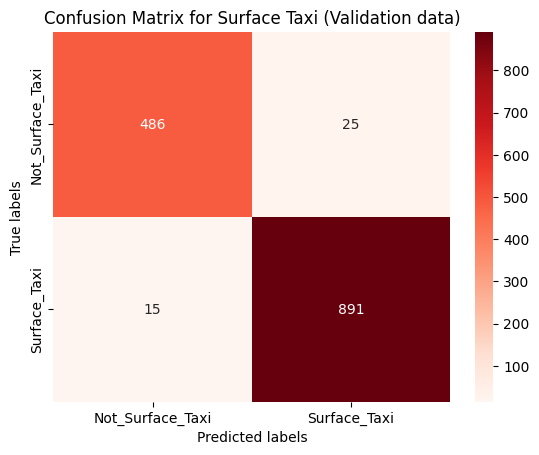

In [74]:
CM2 = metrics.confusion_matrix(Y2, y2_pred_LR)    # Create a confusion matrix from predicted y and original y value.
            
AX2= plt.subplot()
sns.heatmap(CM2, annot=True, cmap = 'Reds', fmt='.0f', ax=AX2); 

# labels, title and ticks
AX2.set_xlabel('Predicted labels');AX2.set_ylabel('True labels'); 
AX2.set_title('Confusion Matrix for Surface Taxi (Validation data)')
AX2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); AX2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

# HOVER TAXIS USING DATA FROM 9/19, 9/20, 9/22, 10/6 TO TRAIN AND 10/20 TO VALIDATE

In [75]:
# Dataframe labeling for Hover Taxis
df_h = pd.concat([df1,df2,df3,df4,df5,df6,df7]).reset_index()
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['hover']] = 1


In [76]:
df_h['hover'].value_counts()

0    7235
1    1252
Name: hover, dtype: int64

In [77]:
X3 = df_h[model_features]
y3 = df_h['hover']

In [78]:
# Check the train data

total = 0
h = 0
non_h = 0
for i in y3:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1

In [79]:
print(h)
print(non_h)
print(round(non_h/total,2))

1252
7235
0.85


Create a balanced dataset & train Logistic regression

In [80]:
df_h_train = df_h[df_h['hover']==1]           # The original rows that have label 1
non_df_h_train = df_h[df_h['hover']==0]       # The original rows that have label 0

In [81]:
print(len(df_h_train))
print(len(non_df_h_train))

1252
7235


In [82]:
sampled_non_df_h = non_df_h_train.sample(n = 1252)    # Sample 1252 data points from the hover taxi data

In [83]:
print(len(df_h_train))
print(len(sampled_non_df_h))

1252
1252


In [84]:
merged3 = pd.concat([df_h_train, sampled_non_df_h])     # After balancing, concatenating  both classes into 1 dataframe

In [85]:
print(len(merged3))

2504


In [86]:
merged3

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
2955,320,2022-09-19 21:57:07,39.872003,-75.244645,3.048627,254.362216,242.319608,5.605137,5.609278,3.657137,...,0.0,-0.442196,-4.921765,-1.968549,42.530020,-7.193882,52.264863,52.443392,52.443392,1
2956,321,2022-09-19 21:57:08,39.871999,-75.244679,3.037708,254.180958,242.138375,5.810917,5.811935,4.162687,...,0.0,-0.323062,-6.295167,-1.465167,42.635708,-3.533979,52.550687,53.252729,53.252729,1
2957,322,2022-09-19 21:57:09,39.871991,-75.244714,3.308431,254.661020,242.618333,6.050529,6.053990,4.328373,...,0.0,0.065843,-6.191294,-0.783667,42.660000,-2.734980,52.451216,53.174941,53.174941,1
2958,323,2022-09-19 21:57:10,39.871981,-75.244749,3.645294,255.137765,243.095275,6.369373,6.372433,4.275510,...,0.0,0.341706,-6.662549,1.319098,42.664294,-1.857176,52.303235,52.797627,52.797627,1
2959,324,2022-09-19 21:57:11,39.871969,-75.244787,3.964400,256.115300,244.072780,6.803520,6.806314,4.166440,...,0.0,1.034800,-6.927800,1.604640,42.654960,-0.870780,52.173660,52.451680,52.451680,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,77,2022-09-19 21:53:04,39.872849,-75.234791,0.160000,1.050717,349.002065,0.004522,0.004675,1.682717,...,0.0,-0.045804,33.367522,-20.900130,3.632000,-4.585000,44.229978,35.611522,35.611522,0
2783,148,2022-09-19 21:54:15,39.872672,-75.235416,0.384286,265.732347,253.684204,4.738959,4.739159,-1.762122,...,1.0,-0.491163,-32.998816,-3.660082,36.263531,-1.335041,46.207653,39.016735,39.016735,0
5133,0,2022-09-22 21:14:55,20.889361,-156.436185,0.038182,26.052182,35.532727,0.354818,0.368740,0.393182,...,1.0,0.084545,13.319182,13.292091,3.722000,74.884000,8.871364,-5.665000,-5.665000,0
6733,1600,2022-09-22 21:41:35,20.903704,-156.425491,0.762750,199.588550,209.071275,16.143250,16.143871,3.109375,...,0.0,1.207700,-5.945225,-3.820275,38.352100,-2.270725,48.340475,43.814300,43.814300,0


In [87]:
# Split the data into X and y
x3 = merged3[model_features]   
y3 = merged3['hover']

In [88]:
total = 0
h = 0
non_h = 0
for i in y3:
    if i == 1:
        h += 1
    else:
        non_h += 1
    total += 1
    
print(h)
print(non_h)
print(non_h/total)

1252
1252
0.5


In [89]:
#LR standardizing 
scaler3 = StandardScaler()
x3 = scaler3.fit_transform(x3)


LR3 = LogisticRegression()    # Bring empty logistic regression model
LR3.fit(x3,y3)                  # Train the model with all data
print('Accuracy of LR classifier on training set: {:.2f}'
     .format(LR3.score(x3, y3)))


Accuracy of LR classifier on training set: 0.85


In [90]:
y3_pred_LR = LR3.predict(x3)

LR3_accuracy = metrics.accuracy_score(y3_pred_LR,y3)
print('Hover Taxi Accuracy (training) = ',LR3_accuracy)
print('Recall = ',metrics.recall_score(y3, y3_pred_LR))
print('Precision = ',metrics.precision_score(y3, y3_pred_LR))

Hover Taxi Accuracy (training) =  0.8498402555910544
Recall =  0.950479233226837
Precision =  0.7912234042553191


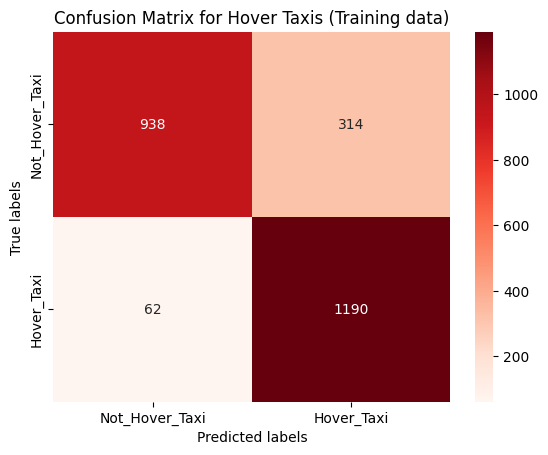

In [91]:
cm3 = metrics.confusion_matrix(y3, y3_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    

ax3= plt.subplot()
sns.heatmap(cm3, annot=True, cmap = 'Reds', fmt='.0f', ax=ax3);  
# labels, title and ticks
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Hover Taxis (Training data)')
ax3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); ax3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);

In [92]:
y3_pred_proba = LR3.predict_proba(x3)   # Get the probability of LR classification (replace with other classifier results as needed)
                                          
false_positive_rate3, true_positive_rate3, thresholds3 = metrics.roc_curve(y3, y3_pred_proba[:,1])     
# Orignally predict_proba returned 2 values for both classes. 
# So, we picked second one which gives the probability of class 1

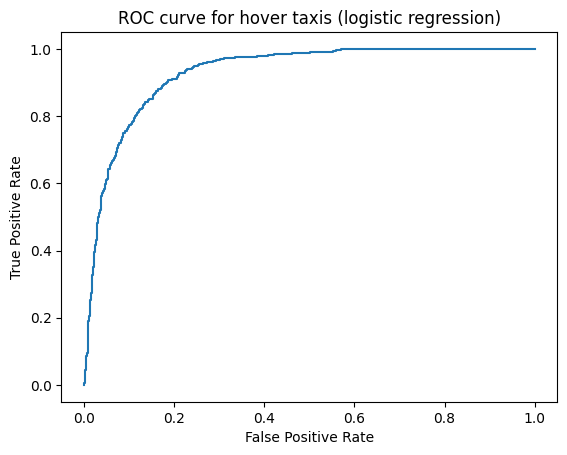

In [93]:
# Plot ROC curve 
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for hover taxis (logistic regression)')
plt.plot(false_positive_rate3, true_positive_rate3)  


In [94]:
# Compute AUC
auc3 = metrics.auc(false_positive_rate3, true_positive_rate3)   # metrics also provide the auc area
print("AUC curve for hover taxis (LR) =", auc3)

AUC curve for hover taxis (LR) = 0.9284550470046646


### Saving Model

In [95]:
pickle.dump(LR3, open('hover_ss2.pkl', 'wb'))

In [96]:
pickle.dump(scaler3, open('scaler3_ss.pkl','wb'))

### Load new data for validation

In [97]:
# reading files from 10/20 dataset
dfhover = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfhover = df_transformation(dfhover)

C:\Users\fariy\AppData\Local\Temp\ipykernel_23644\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [98]:
dfhover['hover'] = 0

dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['hover']] = 1
dfhover.loc[(dfhover['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['hover']] = 1
dfhover

,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,roll,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
0,2022-10-20 21:19:29,51.462292,-0.451407,0.020000,89.739556,89.516000,0.321667,0.329948,0.619333,0.785556,...,1.0,0.044000,-0.418556,-8.537667,3.595667,-9.838111,0.000000,-5.374333,-5.374333,0
1,2022-10-20 21:19:30,51.462292,-0.451407,0.051351,89.347595,89.123865,0.040459,0.043540,0.671757,0.586081,...,1.0,-0.126703,0.530730,0.700162,3.612054,-9.851946,0.000000,-4.986000,-4.986000,0
2,2022-10-20 21:19:31,51.462292,-0.451407,0.060000,89.505306,89.281556,0.002278,0.002567,0.675694,0.557528,...,1.0,-0.034167,0.606722,-0.132028,3.548028,-9.858083,0.000000,-2.689556,-2.689556,0
3,2022-10-20 21:19:32,51.462292,-0.451407,0.060000,89.540108,89.316351,0.001054,0.002066,0.676405,0.554432,...,1.0,-0.010919,0.579514,-0.028351,3.575892,-9.864270,0.000000,-1.498676,-1.498676,0
4,2022-10-20 21:19:33,51.462292,-0.451407,0.060000,89.555083,89.331528,0.000944,0.001596,0.676694,0.552472,...,1.0,-0.002639,0.897722,-0.031250,3.579389,-10.675278,0.000000,-0.702167,-0.702167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,2022-10-20 22:01:53,51.472413,-0.467716,0.120000,255.100974,254.870000,0.000000,0.000000,0.877949,0.023000,...,1.0,-0.000359,30.270026,-6.240692,3.732000,1.643385,43.994000,35.081795,35.081795,0
2459,2022-10-20 22:01:54,51.472413,-0.467716,0.120000,254.911056,254.680306,0.046278,0.046263,0.885250,0.015194,...,1.0,-0.065611,30.119806,-6.162111,3.732000,1.636833,13.442528,16.198861,16.198861,0
2460,2022-10-20 22:01:55,51.472413,-0.467716,0.120000,253.661000,253.430270,0.037622,0.038063,0.881405,0.024730,...,1.0,-0.421027,30.729297,-6.434946,3.739324,1.657459,0.000000,-4.099730,-4.099730,0
2461,2022-10-20 22:01:56,51.472413,-0.467716,0.120000,253.704162,253.473459,0.005973,0.006037,0.801757,0.031649,...,1.0,-0.233838,30.979135,-6.213486,3.756514,1.886703,0.000000,-2.887649,-2.887649,0


In [99]:
# Split the data into X and y
X3 = dfhover[model_features]   
Y3 = dfhover['hover']

### Load pickle

In [100]:
LR3_loaded = pickle.load(open('hover_ss2.pkl', 'rb'))
scaler3_loaded = pickle.load(open('scaler3_ss.pkl','rb'))

In [101]:
# LR

x3_valid = scaler3_loaded.transform(X3)

In [102]:
validation3_LR = LR3_loaded.predict(x3_valid)
print("Accuracy of Model::",accuracy_score(Y3,validation3_LR))

Accuracy of Model:: 0.8660170523751523


In [103]:
y3_pred_LR = LR3.predict(x3_valid)

LR10_accuracy = metrics.accuracy_score(y3_pred_LR,Y3)
print('Hover Taxi accuracy (validation) = ', LR10_accuracy)
print('Recall = ',metrics.recall_score(Y3, y3_pred_LR))
print('Precision = ',metrics.precision_score(Y3, y3_pred_LR))

Hover Taxi accuracy (validation) =  0.8660170523751523
Recall =  0.9869942196531792
Precision =  0.6802788844621513


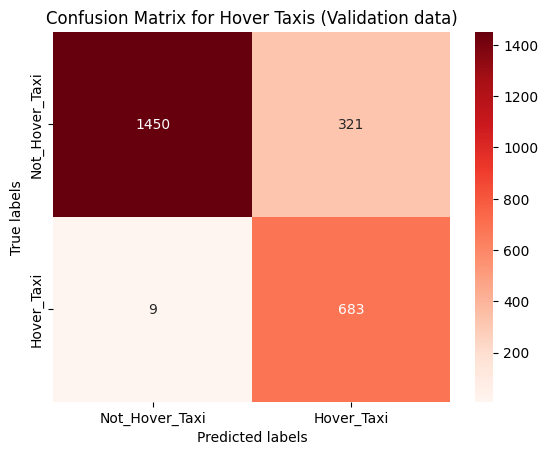

In [104]:
CM3 = metrics.confusion_matrix(Y3, y3_pred_LR)    # Create a confusion matrix from predicted y and original y value.
                                                    
           
AX3= plt.subplot()
sns.heatmap(CM3, annot=True, cmap = 'Reds', fmt='.0f', ax=AX3); 

# labels, title and ticks
AX3.set_xlabel('Predicted labels');AX3.set_ylabel('True labels'); 
AX3.set_title('Confusion Matrix for Hover Taxis (Validation data)')
AX3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); AX3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);